In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import numpy as np
import pandas as pd

In [205]:
df = pd.read_csv("D:\python school\datasetOR.csv")
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [206]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df=df.rename(columns = {'LOR ':'LOR'})

In [207]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


In [208]:
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


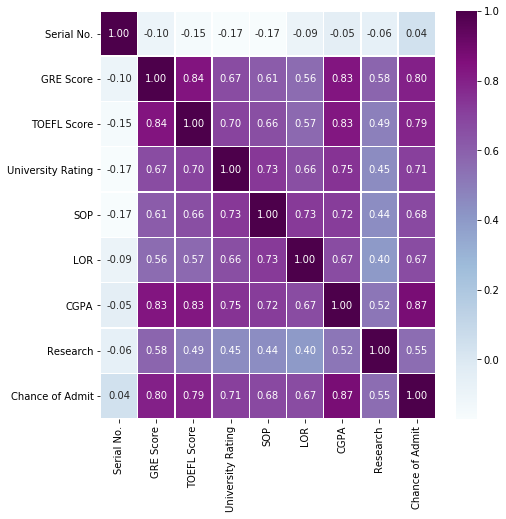

In [66]:
fig,ax = plt.subplots(figsize=(7.5, 7.5))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.5, fmt= '.2f',cmap="BuPu")
plt.show()

N Research: 181
Y Research: 219


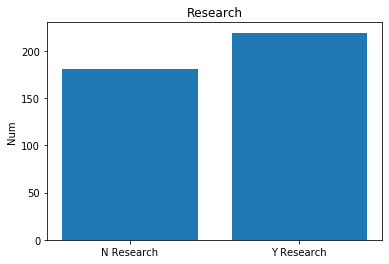

In [209]:
print("N Research:",len(df[df.Research == 0]))
print("Y Research:",len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["N Research","Y Research"]
plt.bar(x,y)
plt.title("Research")
plt.xlabel("")
plt.ylabel("Num")
plt.show()

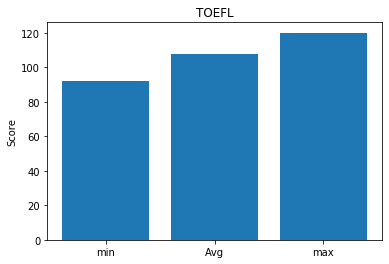

In [210]:
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["min","Avg","max"]
plt.bar(x,y)
plt.title("TOEFL")
plt.xlabel("")
plt.ylabel("Score")
plt.show()

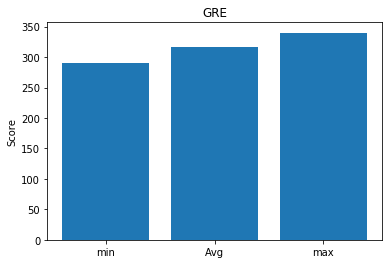

In [211]:
y = np.array([df["GRE Score"].min(),df["GRE Score"].mean(),df["GRE Score"].max()])
x = ["min","Avg","max"]
plt.bar(x,y)
plt.title("GRE")
plt.xlabel("")
plt.ylabel("Score")
plt.show()

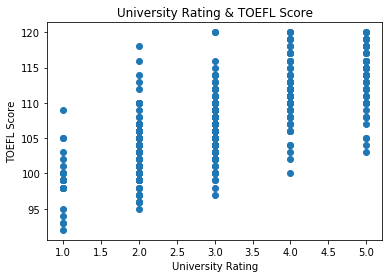

In [212]:
plt.scatter(df["University Rating"],df["TOEFL Score"])
plt.title("University Rating & TOEFL Score")
plt.xlabel("University Rating")
plt.ylabel("TOEFL Score")
plt.show()

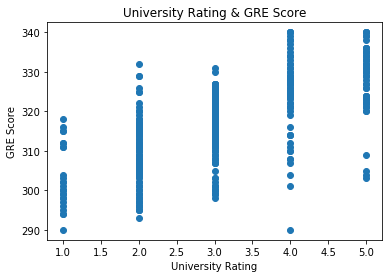

In [213]:
plt.scatter(df["University Rating"],df["GRE Score"])
plt.title("University Rating & GRE Score")
plt.xlabel("University Rating")
plt.ylabel("GRE Score")
plt.show()

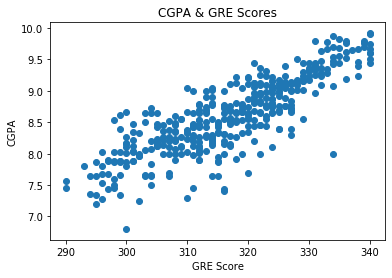

In [214]:
plt.scatter(df["GRE Score"],df["CGPA"])
plt.title("CGPA & GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

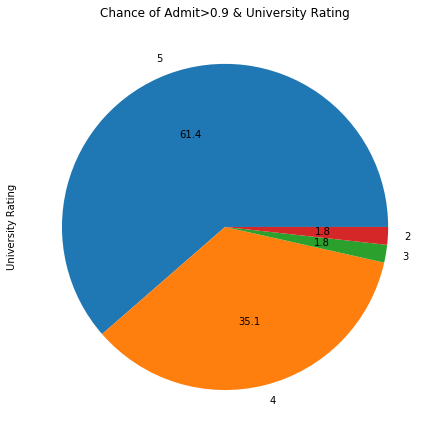

In [220]:
abc = df[df["Chance of Admit"] >= 0.9]["University Rating"].value_counts().head(5)
plt.title("Chance of Admit>0.9 & University Rating")
abc.plot(kind='pie',figsize=(7.5, 7.5),autopct='%1.1f')

In [108]:
df = pd.read_csv("D:\python school\datasetOR.csv")

serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df=df.rename(columns = {'LOR ':'LOR'})

In [109]:
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 55)

In [222]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

### <a id='linearRegression'>線性回歸</a>

In [232]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(x_train,y_train)
y_LinearRegression = lr.predict(x_test)

print("第一組y的真實值 " + str(y_test[1]) + " 預測出的值:" + str(LinearRegression.predict(x_test.iloc[[1],:])))
print("第二組y的真實值 " + str(y_test[2]) + " 預測出的值:" + str(LinearRegression.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square: ", r2_score(y_test,y_LinearRegression))

第一組y的真實值 0.77 預測出的值:[0.79654287]
第二組y的真實值 0.84 預測出的值:[0.80740568]
r_square:  0.8216256746284833


In [281]:
from sklearn import metrics

# (MAE)
print(metrics.mean_absolute_error(y_test,y_LinearRegression))

# (MSE)
print(metrics.mean_squared_error(y_test,y_LinearRegression))

# (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test,y_LinearRegression)))

0.046665038327325895
0.003898772223226582
0.06244014912879839


AxesSubplot(0.125,0.125;0.775x0.755)


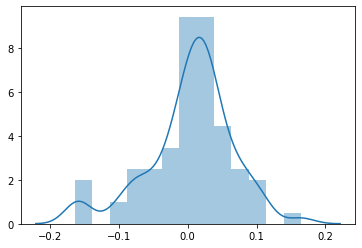

In [282]:
print(sns.distplot((y_test-y_LinearRegression)))

### <a id='rfRegression'>隨機森林</a>

In [226]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
RandomForestRegressor.fit(x_train,y_train)
y_RandomForestRegressor = RandomForestRegressor.predict(x_test) 

from sklearn.metrics import r2_score
print("第一組y的真實值 " + str(y_test[1]) + " 預測出的值:" + str(RandomForestRegressor.predict(x_test.iloc[[1],:])))
print("第二組y的真實值 " + str(y_test[2]) + " 預測出的值:" + str(RandomForestRegressor.predict(x_test.iloc[[2],:])))
print("r_square: ", r2_score(y_test,y_RandomForestRegressor))

第一組y的真實值 0.77 預測出的值:[0.7711]
第二組y的真實值 0.84 預測出的值:[0.8027]
r_square:  0.7872864209815964


In [227]:
from sklearn import metrics

# (MAE)
print(metrics.mean_absolute_error(y_test,y_RandomForestRegressor))

# (MSE)
print(metrics.mean_squared_error(y_test,y_RandomForestRegressor))

# (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test,y_RandomForestRegressor)))

0.051368750000000005
0.004649333875000003
0.06818602404452105


AxesSubplot(0.125,0.125;0.775x0.755)


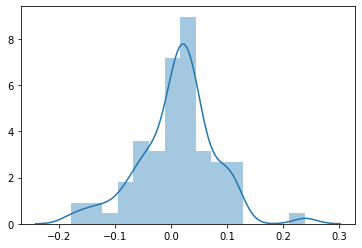

In [283]:
print(sns.distplot((y_test-y_RandomForestRegressor)))

### <a id='dtRegression'>決策樹</a>

In [228]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor = DecisionTreeRegressor(random_state = 42)
DecisionTreeRegressor.fit(x_train,y_train)
yDecisionTreeRegressor = dtr.predict(x_test) 

from sklearn.metrics import r2_score
print("第一組y的真實值 " + str(y_test[1]) + " 預測出的值:" + str(DecisionTreeRegressor.predict(x_test.iloc[[1],:])))
print("第二組y的真實值 " + str(y_test[2]) + " 預測出的值:" + str(DecisionTreeRegressor.predict(x_test.iloc[[2],:])))
print("r_square: ", r2_score(y_test,yDecisionTreeRegressor))


第一組y的真實值 0.77 預測出的值:[0.76]
第二組y的真實值 0.84 預測出的值:[0.8]
r_square:  0.47128527147742727


In [229]:
from sklearn import metrics

# (MAE)
print(metrics.mean_absolute_error(y_test,yDecisionTreeRegressor))

# (MSE)
print(metrics.mean_squared_error(y_test,yDecisionTreeRegressor))

# (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test,yDecisionTreeRegressor)))

0.075125
0.01155625
0.1075


AxesSubplot(0.125,0.125;0.775x0.755)


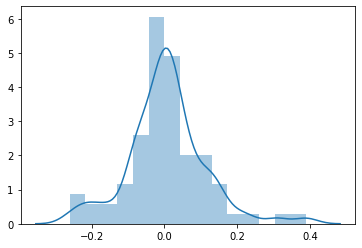

In [284]:
print(sns.distplot((y_test-yDecisionTreeRegressor)))

### <a id='comparisonOfRegression'>Comparison of Regression Algorithms</a>

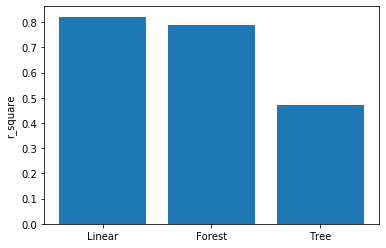

In [233]:
y = np.array([r2_score(y_test,y_LinearRegression),
              r2_score(y_test,y_RandomForestRegressor),r2_score(y_test,yDecisionTreeRegressor)])
x = ["Linear","Forest","Tree"]
plt.bar(x,y)
plt.ylabel("r_square")
plt.show()

## <a id='classification'>CLASSIFICATION ALGORITHMS (SUPERVISED MACHINE LEARNING ALGORITHMS)</a>

In [234]:
df = pd.read_csv("D:\python school\datasetOR.csv")

serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 55)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

y_train2 = [1 if each > 0.75 else 0 for each in y_train]
y_test2  = [1 if each > 0.75 else 0 for each in y_test]

y_train2 = np.array(y_train2)
y_test2 = np.array(y_test2)

print(y_train2)
print(y_test2)

C:\Users\Hank\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Hank\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Hank\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

[1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0
 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0
 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1]
[1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 0 0 0 1]


### <a id='lr'>羅吉斯回歸</a>

C:\Users\Hank\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score: 0.85
[[39  6]
 [ 6 29]]


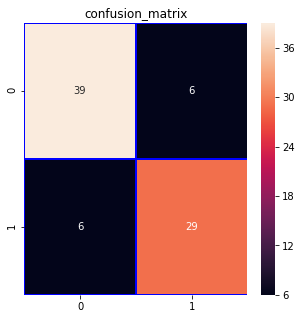

precision:  0.8285714285714286
recall:  0.8285714285714286
f1:  0.8285714285714286


In [240]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(x_train,y_train2)
print("score:", LogisticRegression.score(x_test,y_test2))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2,LogisticRegression.predict(x_test))
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(confusion_matrix,annot = True,linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plt.title("confusion_matrix")
plt.show()

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
print("precision: ", precision_score(y_test2,LogisticRegression.predict(x_test)))
print("recall: ", recall_score(y_test2,LogisticRegression.predict(x_test)))

print("f1: ",f1_score(y_test2,LogisticRegression.predict(x_test)))

score:  0.8375
[[39  6]
 [ 7 28]]


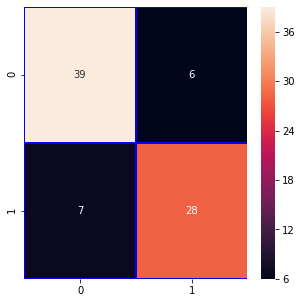

precision:  0.8235294117647058
recall:  0.8
f1:  0.8115942028985507


In [242]:
from sklearn.naive_bayes import GaussianNB
GaussianNB = GaussianNB()
GaussianNB.fit(x_train,y_train2)
print("score: ", GaussianNB.score(x_test,y_test2))



from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test2,GaussianNB.predict(x_test))
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(confusion_matrix,annot = True,linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)

plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision: ", precision_score(y_test2,GaussianNB.predict(x_test)))
print("recall: ", recall_score(y_test2,GaussianNB.predict(x_test)))

from sklearn.metrics import f1_score
print("f1: ",f1_score(y_test2,GaussianNB.predict(x_test)))

In [258]:
df = pd.read_csv("D:\python school\datasetOR.csv")
df=df.rename(columns = {'Chance of Admit ':'ChanceAdmit'})
df.drop(["Serial No."],axis=1,inplace = True)
y = df["ChanceAdmit"] 
x = df.drop(["ChanceAdmit"],axis=1)

In [259]:
from sklearn.decomposition import PCA
PCA = PCA(n_components = 1, whiten= True )  
PCA.fit(x)
PCAX = PCA.transform(x)                     #降維
PCAX = PCAX.reshape(400,)
dictionary = {"x":PCAX,"y":y}
data = pd.DataFrame(dictionary)
print("降維度後")
print(data.head())
print("-------------------------------------------------------------------------------------------")
print("降維前")
print(df.head())

降維度後
          x     y
0 -1.802871  0.92
1 -0.507365  0.76
2  0.175069  0.72
3 -0.452796  0.80
4  0.362090  0.65
-------------------------------------------------------------------------------------------
降維前
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   ChanceAdmit  
0         0.92  
1         0.76  
2         0.72  
3         0.80  
4         0.65  


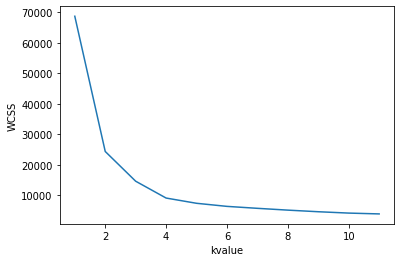

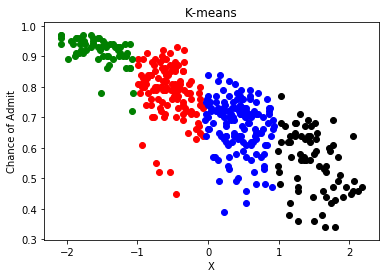

In [280]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.xlabel("kvalue")
plt.ylabel("WCSS")               #within-cluster sum of squares 組內平方和
plt.show()

kmeans = KMeans(n_clusters=4)
clusters_knn = kmeans.fit_predict(x)

df["label_kmeans"] = clusters_knn
plt.scatter(data.x[df.label_kmeans == 0 ],data[df.label_kmeans == 0].y,color = "red")
plt.scatter(data.x[df.label_kmeans == 1 ],data[df.label_kmeans == 1].y,color = "blue")
plt.scatter(data.x[df.label_kmeans == 2 ],data[df.label_kmeans == 2].y,color = "green")
plt.scatter(data.x[df.label_kmeans == 3 ],data[df.label_kmeans == 3].y,color = "black")
plt.title("K-means")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()